# The Independent Set Boolean Function 

Consider a graph $G = \{V,E\}$, with $V = \{x_1, x_2, ..., x_n\}$ being the set of verticies $x_i$ and $E =\{x_i,x_j\}$ being the set of edges between nodes $x_i$ and $x_j$.

An "independent set" is a set, $S$, of verticies from graph $G$ such that no two verticies coincide with the same edge. This may be interpreted as a bitstring, $B$,  of the $n = |V|$ verticies in $G$, with non-negation indicating inclusion and negation indicating exclusion from the independent set. 
For a path on three verticies, $P_3$, a independent set bitstring $B$ may be  $x_0 \neg{x_1} x_2$, or $101$

So in general, a Boolean function that verifies an independent set of a graph $G$ would be: $IS(G) = \bigwedge_{x_i,x_j \in E}{\neg(x_i \land x_j)}$

Note a few things:
- IS(G) is a conjunction of NANDs, i.e an "AND of NANDs". It is a constraint where for each edge, not both veritices are allowed inclusion into the set... otherwise it would not be independent. So for a graph $G$ with edges $\{x_i,x_j\}$, $IS(G) = \neg{({x_i} \wedge x_j)} \wedge \neg{(x_{i+1} \wedge x_{j+1})} \wedge \neg{(x_{i+2} \wedge x_{j+2})} \wedge ... \wedge  \neg{(x_{n} \wedge x_{m})} $ for all edge pairs $\{x_i,x_j\}$ through $\{x_n,x_m\}$
- For an edge, it is possible for both verticies to not be included in the set. A bitstring $\neg{x_0} \neg{x_1} \neg{x_2} ... \neg{x_n}$ is the trivial independent set





# IS Boolean Translation 

Notice that by De'Morgans law: 

$IS(G) = \neg{({x_i} \wedge x_j)} \wedge \neg{(x_{i+1} \wedge x_{j+1})} \wedge \neg{(x_{i+2} \wedge x_{j+2})} \wedge ... \wedge\neg{(x_{n} \wedge x_{m})} $ 
- $ = \neg{( ({x_i} \wedge x_j) \vee (x_{i+1} \wedge x_{j+1}) \vee (x_{i+2} \wedge x_{j+2}) \vee ... \vee (x_{n} \wedge x_{m}))}$

For notational simplicitly let $e_{i,j} = ( x_i \wedge x_j)$, for all edge pairs in G.
We can then rewrite $IS(G)$ as: 
- $IS(G) = \neg{( e_{i,j} \vee e_{i+1,j+1} \vee e_{i+2,j+2} \vee ... \vee e_{n,m} )}$

The reader can verify via truth tables or otherwise that: 

- $a \vee b = (a \wedge \neg{b}) \oplus b$, where $\oplus$ is the logical XOR, i.e, addition mod 2. 

By applying this transformation to the first two terms, we see that: 

- $IS(G) = \neg{((e_{i,j} \wedge \neg{e_{i+1,j+1}}) \oplus e_{i+1,j+1} \vee e_{i+2,j+2} \vee ... \vee e_{n,m}}$

Applying it again with $a = (e_{i,j} \wedge \neg{e_{i+1,j+1}})$ and $b = e_{i+2,j+2}$ yeilds: 

- $IS(G) = \neg{(( ((e_{i,j} \wedge \neg{e_{i+1,j+1}}) \oplus e_{i+1,j+1}) \wedge \neg{e_{i+2,j+2}}) \oplus e_{i+2,j+2} \vee ... \vee e_{n,m})}$


It should be noted that the logical $\wedge$ distributes over the logical $\oplus$, i.e $a \wedge ( b \oplus c) = (a \wedge b) \oplus (a \wedge c)$. And of course, the associativity of $\wedge$ and $\vee$ within their respective operations is valuable.
Distributing in $IS(G)$ and applying the OR to XOR transformation, it is observed inductively that: 

- $IS(G) = \neg{((((e_{i,j} \wedge \neg{e_{i+1,j+1}} \wedge \neg{e_{i+2,j+2}}) \oplus (e_{i+1,j+1} \wedge \neg{e_{i+2, j+2}}) \oplus {e_{i+2,j+2}} } \vee ... \vee e_{n,m}$

And more generally:

- $IS(G) = \neg{((e_{i,j} \wedge \neg{e_{i+1, j+1}} \wedge \neg{e_{i+2,j+2}} \wedge \neg{e_{i+3,j+3}} \wedge ... \wedge \neg{{e_{n, m}}}) \oplus (e_{i+1,j+1} \wedge \neg{e_{i+2,j+2}} \wedge \neg{e_{i+3,j+3}} \wedge ... \wedge \neg{e_{n,m}}) \oplus ... \oplus (e_{n-1,m-1} \wedge \neg{e_{n,m}}) \oplus e_{n,m})}$

where, again, $e_{i,j}$ is the conjunction $(x_i \wedge x_j)$ for all $i \leq n, j \leq m$. 

To reiterate: $x_i$ and $x_j$ are Boolean variables that equal 1 if vertex $x_i$ or $x_j$ are in the proposed "independent set" equaling 1 in in the bitstring $B$ and 0 if not.

# In Code

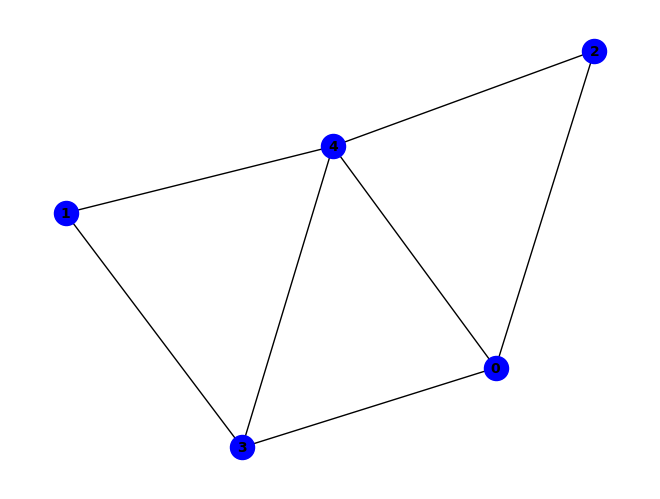

~((d & e) ^ (b & d & ~e) ^ (c & e & ~d) ^ (a & c & ~d & ~e) ^ (a & d & ~b & ~e) ^ (b & e & ~c & ~d) ^ (a & e & ~b & ~c & ~d))
['00000', '00001', '00010', '00100', '00110', '01000', '01100', '10000', '11000']


In [9]:
from oracle import GraphGenerator, BooleanInstance
import sympy as sp
from sympy.abc import a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t
symbolsAvail = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t]

k = 5 #getting 4 node graph for example

graphGetter = GraphGenerator()
graphArray = graphGetter.createKgraphs(k) 

graphNumber = 15  #[0,len(graphArray)]
chosenGraph = graphGetter.chooseGraph(graphNumber)
graphGetter.printGraph()

symbolUse = []
edgeConj = []
XorTerms = []

for vertex in chosenGraph.nodes():
    symbolUse.append(symbolsAvail[vertex])


for edge in chosenGraph.edges():
    edgeConj.append((symbolUse[edge[0]] & symbolUse[edge[1]]))
    
for i in range(len(edgeConj)):
    j = i + 1
    bigConj = edgeConj[i]
    while(j < len(edgeConj)):
        neg = sp.Not(edgeConj[j])
        bigConj = bigConj & neg
        j+=1
    bigConj = sp.logic.boolalg.simplify_logic(bigConj)
    XorTerms.append(bigConj)
finalEsop = sp.Xor(*XorTerms)
finalFr = sp.Not(finalEsop)
print(finalFr)

table = sp.logic.boolalg.truth_table(finalFr, symbolUse)
feasibleStates = []
for t in table:
            strSol = ""            ##collect true terms, "minterms", add attribute 
            for bit in t[0]:
                strSol+= str(bit)
            if(t[1] == True):
                feasibleStates.append(strSol)
print(feasibleStates)

Notice that sometimes a disjunction of negations will sometimes occur in the xor terms, such as "a & b & (\~c | \~d)". This is not a problem because the transformation of OR to XOR can handle this.. i.e 
 - a & b & (\~c | \~d) 
 - = (a & b & ((\~c & d) ^ d)) \\\apply transformation
 - = (a & b & \~c & d ) ^ (a & b & d)  \\\distribute and over xor
 - = (a & b & d) ^ (1 ^ \~c) \\\ 1 ^ a = ~a
 - = a & b & c & d

 
 Notice also that $a \vee b = (a \wedge \neg{b}) \oplus b$ could possibly be generalized to substitute OR any Boolean Expression and reduced, but more more cases need be considered: 
 - $(x \vee y) \wedge \neg{z} = ((x \wedge \neg{y}) \oplus y) \wedge \neg{z} =  (x \wedge \neg{y} \wedge z) \oplus (y \wedge \neg{z}) $
 